## Homework 5: Support Vector Machine

### Name: Annan Jesse
### ID: 002708111

#### Loading important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics

#### Reading data files

In [2]:
dtrain1 = pd.read_csv('./dataset1_training.csv', header=None)
dtrain2 = pd.read_csv('./dataset2_training.csv', header=None)
dtest1 = pd.read_csv('./dataset1_testing.csv', header=None)
dtest2 = pd.read_csv('./dataset2_testing.csv', header=None)

### Dataset 1

#### Exploring Training Data files and Splitting

In [3]:
Xtrain1, ytrain1 = dtrain1[{0,1}], dtrain1[2]
Xtest1, ytest1 = dtest1[{0,1}], dtest1[2]
dtrain1.head()

/tmp/ipykernel_11502/892815078.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Xtrain1, ytrain1 = dtrain1[{0,1}], dtrain1[2]
/tmp/ipykernel_11502/892815078.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Xtest1, ytest1 = dtest1[{0,1}], dtest1[2]


,0,1,2
0,1.53,3.13,0
1,0.58,2.83,0
2,0.28,2.69,0
3,1.14,2.14,0
4,1.46,3.39,0


#### Generating  and Evaluating Model

In [4]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(Xtrain1, ytrain1)
ypred1 = clf1.predict(Xtest1)

In [5]:
accuracy = metrics.accuracy_score(ytest1, ypred1)
print(f'Accuracy for dataset 1: {accuracy*100:.2f}%')

Accuracy for dataset 1: 100.00%


#### Plotting the decision function

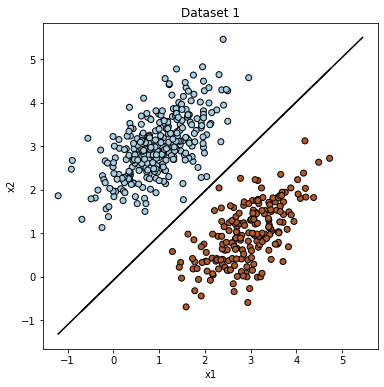

In [6]:
# get the separating hyperplane
w = clf1.coef_[0]
a = -w[0] / w[1]
xar = np.linspace(Xtrain1.min(), Xtrain1.max())
yar = a * xar - (clf1.intercept_[0]) / w[1]

#margin = 1 / np.sqrt(np.sum(clf1.coef_ ** 2))
#yar_down = yar - np.sqrt(1 + a ** 2) * margin
#yar_up = yar + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(6, 6))
plt.clf()
plt.plot(xar, yar, "k-")
#plt.plot(xar, yar_down, "r:")
#plt.plot(xar, yar_up, "b:")

# plt.scatter(clf1.support_vectors_[:, 0],
#             clf1.support_vectors_[:, 1],
#             s=80, facecolors="none",
#             zorder=10, edgecolors="k")
plt.scatter(Xtrain1[0], Xtrain1[1],
            c=ytrain1, zorder=10, cmap=plt.cm.Paired,
            edgecolors="k")
plt.title('Dataset 1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Dataset 2

#### Exploring Training Data files and Splitting

In [7]:
Xtrain2, ytrain2 = dtrain2[{0,1}], dtrain2[2]
Xtest2, ytest2 = dtest2[{0,1}], dtest2[2]
dtrain2.head()

/tmp/ipykernel_11502/2443581852.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Xtrain2, ytrain2 = dtrain2[{0,1}], dtrain2[2]
/tmp/ipykernel_11502/2443581852.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Xtest2, ytest2 = dtest2[{0,1}], dtest2[2]


,0,1,2
0,0.130359,0.026001,1
1,-0.274629,0.985175,0
2,-0.004553,0.074094,1
3,0.119707,0.121914,1
4,0.041210,0.144460,1


In [8]:
clf2 = svm.SVC(kernel='rbf', degree=3)
clf2.fit(Xtrain2, ytrain2)
ypred2 = clf2.predict(Xtest2)

In [9]:
accuracy = metrics.accuracy_score(ytest2, ypred2)
print(f'Accuracy for dataset 2: {accuracy*100:.2f}%')

Accuracy for dataset 2: 100.00%


#### Plotting the decision boundary

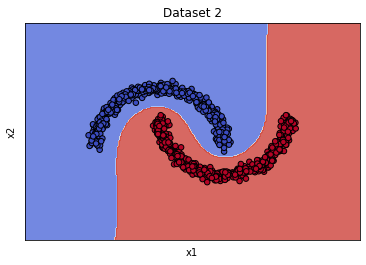

In [10]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ("Dataset 2")
# Set-up grid for plotting.
xar, yar = make_meshgrid(Xtrain2[0], Xtrain2[1])
plot_contours(ax, clf2, xar, yar, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(Xtrain2[0], Xtrain2[1],
           c=ytrain2, cmap=plt.cm.coolwarm,
           s=30, edgecolors="k")
ax.set_ylabel("x2")
ax.set_xlabel("x1")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

#


#

#

###### credits / references:
1. https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
2. https://scikit-learn.org/stable/modules/svm.html
3. https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8